## Proyecto 

In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read database
df = pd.read_csv('cardiovascular_disease.csv', encoding='ISO-8859-1')
df.head(5)

/var/folders/wj/3_csl2wx1cdgyk8j3p42j6880000gn/T/ipykernel_7973/4191872533.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cardiovascular_disease.csv', encoding='ISO-8859-1')


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [3]:
#df.to_excel('datos_proyecto.xlsx', index=False)

In [4]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart Disease                    object
Skin Cancer                      object
Other Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age Category                     object
Height (cm)                       int64
Weight (kg)                     float64
BMI                             float64
Smoking History                  object
Alcohol Consumption               int64
Fruit Consumption                object
Green_Vegetables_Consumption      int64
FriedPotato Consumption           int64
dtype: object

In [5]:
pd.isnull(df).sum()

General_Health                     0
Checkup                            0
Exercise                         101
Heart Disease                      0
Skin Cancer                        0
Other Cancer                       0
Depression                      3088
Diabetes                           0
Arthritis                          0
Sex                                0
Age Category                       0
Height (cm)                        0
Weight (kg)                        0
BMI                                0
Smoking History                    0
Alcohol Consumption                0
Fruit Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato Consumption            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308753 non-null  object 
 3   Heart Disease                 308854 non-null  object 
 4   Skin Cancer                   308854 non-null  object 
 5   Other Cancer                  308854 non-null  object 
 6   Depression                    305766 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age Category                  308854 non-null  object 
 11  Height (cm)                   308854 non-null  int64  
 12  Weight (kg)                   308854 non-nul

In [7]:
df.shape

(308854, 19)

### Column Exercise

In [8]:
#Unique values
Valores_unicos_Exercise = df['Exercise'].unique()
Valores_unicos_Exercise

array(['No', 'Yes', nan], dtype=object)

In [9]:
#Count How many 'Yes' and 'No' exists
conteo_YN = df['Exercise'].value_counts() 
conteo_YN

Yes    239304
No      69449
Name: Exercise, dtype: int64

In [10]:
#Percentage of yes and NO
porcentaje_yes = (conteo_YN['Yes'] / len(df)) * 100
porcentaje_no = (conteo_YN['No'] / len(df)) * 100

# Mostrar los resultados
print(f'Porcentaje de "Yes": {porcentaje_yes:.2f}%')
print(f'Porcentaje de "No": {porcentaje_no:.2f}%')

Porcentaje de "Yes": 77.48%
Porcentaje de "No": 22.49%


In [11]:
# Percentage of 101
Nulos_Exercise = 101

resultado = Nulos_Exercise * (porcentaje_yes / 100)
resultado_2 = Nulos_Exercise * (porcentaje_no / 100)

print(f'El 77.48% de {Nulos_Exercise} es: {resultado:.0f}')
print(f'El 22.49% de {Nulos_Exercise} es: {resultado_2:.0f}')

El 77.48% de 101 es: 78
El 22.49% de 101 es: 23


In [12]:
# Value to randomly fill rows with "Yes"
yes_value = 'Yes'
# Value to randomly fill rows with "No"
no_value = 'No'

# Get the index of empty rows
empty_rows = df[df['Exercise'].isnull()].index

# Randomly choose 78 indices for "Yes" and 23 indices for "No"
indices_yes = np.random.choice(empty_rows, size=78, replace=False)
indices_no = np.random.choice(list(set(empty_rows) - set(indices_yes)), size=23, replace=False)

# Fill the selected rows with "Yes" and "No"
df.loc[indices_yes, 'Exercise'] = yes_value
df.loc[indices_no, 'Exercise'] = no_value

In [13]:
#Unique Values
Valores_unicos_Exercise = df['Exercise'].unique()
Valores_unicos_Exercise

array(['No', 'Yes'], dtype=object)

In [14]:
conteo_YN = df['Exercise'].value_counts() #How many 'Yes' and 'No' exists
conteo_YN

Yes    239382
No      69472
Name: Exercise, dtype: int64

### Column Heart Disease

In [15]:
#Unique Values
Valores_unicos_HDisease = df['Heart Disease'].unique()
Valores_unicos_HDisease

array(['No', 'Yes', 'e'], dtype=object)

In [16]:
conteo_YN = df['Heart Disease'].value_counts() #How many 'Yes' and 'No' exists
conteo_YN

No     283882
Yes     24971
e           1
Name: Heart Disease, dtype: int64

In [17]:
porcentaje_yes = (conteo_YN['Yes'] / len(df)) * 100
porcentaje_no = (conteo_YN['No'] / len(df)) * 100
# Mostrar los resultados
print(f'Porcentaje de "Yes": {porcentaje_yes:.2f}%')
print(f'Porcentaje de "No": {porcentaje_no:.2f}%')

Porcentaje de "Yes": 8.09%
Porcentaje de "No": 91.91%


In [18]:
# Valor a buscar y reemplazar
valor_a_buscar = 'e'
nuevo_valor = 'No'
# Buscar y reemplazar en la columna específica
df['Heart Disease'] = df['Heart Disease'].replace(valor_a_buscar, nuevo_valor)

In [19]:
Valores_unicos_HDisease = df['Heart Disease'].unique()
Valores_unicos_HDisease

array(['No', 'Yes'], dtype=object)

In [20]:
conteo_YN = df['Heart Disease'].value_counts() #How many 'Yes' and 'No' exists
conteo_YN

No     283883
Yes     24971
Name: Heart Disease, dtype: int64

### Column Skin Cancer

In [21]:
Valores_unicos_SkinCancer = df['Skin Cancer'].unique()
Valores_unicos_SkinCancer

array(['No', 'Yes', 'dsfg', 'wet', '12*lkl\x96«fg', 'q345345',
       'serter-89', 'dfg 025', 'dfgkl\x96fg-', 'sertret-8'], dtype=object)

In [22]:
# Valores permitidos ("Yes" o "No")
allowed_values = ['Yes', 'No']

# Asignar nulos a los valores que no son "Yes" ni "No" en la columna específica
df.loc[~df['Skin Cancer'].isin(allowed_values), 'Skin Cancer'] = None

# Mostrar el DataFrame después de la operación

In [23]:
conteo_YN = df['Skin Cancer'].value_counts(dropna=False)
conteo_YN

No      278853
Yes      29992
None         9
Name: Skin Cancer, dtype: int64

In [24]:
#Percentaje of yes and no
porcentaje_yes = (conteo_YN['Yes'] / len(df)) * 100
porcentaje_no = (conteo_YN['No'] / len(df)) * 100
# Mostrar los resultados
print(f'Porcentaje de "Yes": {porcentaje_yes:.2f}%')
print(f'Porcentaje de "No": {porcentaje_no:.2f}%')

Porcentaje de "Yes": 9.71%
Porcentaje de "No": 90.29%


In [25]:
Nulos_Exercise = 9

resultado = Nulos_Exercise * (porcentaje_yes / 100)
resultado_2 = Nulos_Exercise * (porcentaje_no / 100)

print(f'El 9.71% de {Nulos_Exercise} es: {resultado:.0f}')
print(f'El 90.20% de {Nulos_Exercise} es: {resultado_2:.0f}')

El 9.71% de 9 es: 1
El 90.20% de 9 es: 8


In [27]:
# Obtener el índice de las filas vacías
filas_vacias = df[df['Skin Cancer'].isnull()].index

# Elegir aleatoriamente 78 índices para "Yes" y 23 índices para "No"
indices_yes = np.random.choice(filas_vacias, size=1, replace=False)
indices_no = np.random.choice(list(set(filas_vacias) - set(indices_yes)), size=8, replace=False)

# Llenar las filas seleccionadas con "Yes" y "No"
df.loc[indices_yes, 'Skin Cancer'] = indices_yes
df.loc[indices_no, 'Skin Cancer'] = indices_no

In [28]:
Valores_unicos_SkinCancer = df['Skin Cancer'].unique()
Valores_unicos_SkinCancer

array(['No', 'Yes', 127023, 127051, 127053, 210253, 223307, 244880,
       245005, 245212, 245295], dtype=object)

In [29]:
conteo_YN = df['Skin Cancer'].value_counts(dropna=False)
conteo_YN

No        278853
Yes        29992
127023         1
127051         1
127053         1
210253         1
223307         1
244880         1
245005         1
245212         1
245295         1
Name: Skin Cancer, dtype: int64

### Other Cancer

In [30]:
Valores_unicos_OtherCancer = df['Other Cancer'].unique()
Valores_unicos_OtherCancer

array(['No', 'Yes', 'dsgw45'], dtype=object)

In [31]:
filas_a_eliminar = df.loc[~df['Other Cancer'].isin(['Yes', 'No'])].index

# Eliminar las filas seleccionadas
df.drop(filas_a_eliminar, inplace=True)

In [32]:
df.shape

(308853, 19)

### Column Depression

In [33]:
Valores_unicos_Depression = df['Depression'].unique()
Valores_unicos_Depression

array(['No', 'Yes', nan], dtype=object)

In [34]:
conteo_YN = df['Depression'].value_counts(dropna = False) #How many 'Yes' and 'No' exists
conteo_YN

No     244491
Yes     61274
NaN      3088
Name: Depression, dtype: int64

In [35]:
porcentaje_yes = round((conteo_YN['Yes'] / len(df)) * 100)
porcentaje_no = round((conteo_YN['No'] / len(df)) * 100)

# Mostrar los resultados
print(f'Porcentaje de "Yes": {porcentaje_yes}%')
print(f'Porcentaje de "No": {porcentaje_no}%')

Porcentaje de "Yes": 20%
Porcentaje de "No": 79%


In [36]:
Nulos_Exercise = 3088

resultado = Nulos_Exercise * (porcentaje_yes / 100)
resultado_2 = Nulos_Exercise * ((porcentaje_no+1) / 100)

print(f'El 20% de {Nulos_Exercise} es: {resultado:.0f}')
print(f'El 80% de {Nulos_Exercise} es: {resultado_2:.0f}')

El 20% de 3088 es: 618
El 80% de 3088 es: 2470


In [37]:
# Valor para llenar aleatoriamente las filas con "Yes"
valor_yes = 'Yes'
# Valor para llenar aleatoriamente las filas con "No"
valor_no = 'No'

# Obtener el índice de las filas vacías
filas_vacias = df[df['Depression'].isnull()].index

# Elegir aleatoriamente 618 índices para "Yes" y 23 índices para "No"
indices_yes = np.random.choice(filas_vacias, size=618, replace=False)
indices_no = np.random.choice(list(set(filas_vacias) - set(indices_yes)), size=2470, replace=False)

# Llenar las filas seleccionadas con "Yes" y "No"
df.loc[indices_yes, 'Depression'] = valor_yes
df.loc[indices_no, 'Depression'] = valor_no

In [38]:
Valores_unicos_Depression = df['Depression'].unique()
Valores_unicos_Depression

array(['No', 'Yes'], dtype=object)

In [39]:
conteo_YN = df['Depression'].value_counts(dropna = False) #How many 'Yes' and 'No' exists
conteo_YN

No     246961
Yes     61892
Name: Depression, dtype: int64

### Column Sex

In [40]:
Valores_unicos_Sex = df['Diabetes'].unique()
Valores_unicos_Sex

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

### Column Diabetes

In [41]:
Valores_unicos_Diabetes = df['Diabetes'].unique()
Valores_unicos_Diabetes

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

### Column Arthritis

In [42]:
Valores_unicos_Arthritis = df['Arthritis'].unique()
Valores_unicos_Arthritis

array(['Yes', 'No'], dtype=object)

### Column Height (cm)

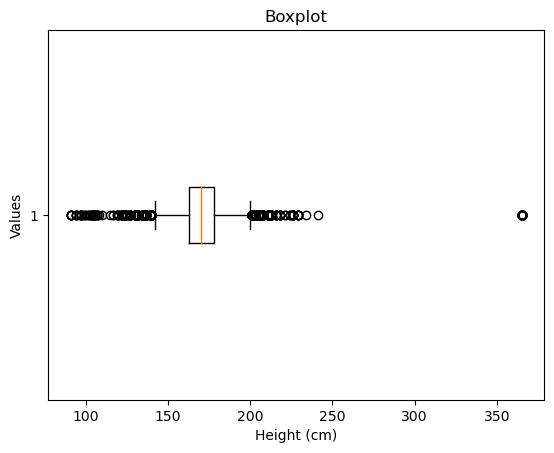

In [43]:
plt.boxplot(df['Height (cm)'], vert = False)
plt.title('Boxplot')
plt.xlabel('Height (cm)')
plt.ylabel('Values')
plt.show()

In [44]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['Height (cm)'].quantile(0.25)
Q3 = df['Height (cm)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outlier values
outliers = df[(df['Height (cm)'] < lower_limit) | (df['Height (cm)'] > upper_limit)]['Height (cm)']

# Show the outlier values
outliers

181       206
454       140
576       135
1734      201
1764      218
         ... 
307810    140
308223    135
308444    140
308560    135
308710    213
Name: Height (cm), Length: 1116, dtype: int64

In [45]:
Q1 = df['Height (cm)'].quantile(0.25)
Q3 = df['Height (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df[(df['Height (cm)'] < limite_inferior) | (df['Height (cm)'] > limite_superior)]

# Encontrar el valor máximo atípico
valor_maximo_atipico = valores_atipicos['Height (cm)'].max()

print("Valor máximo atípico:")
print(valor_maximo_atipico)

Valor máximo atípico:
365


In [46]:
media_con_atipicos=df['Height (cm)'].mean()
media_con_atipicos

170.65361515024946

In [47]:
# replaces all values ​​equal to maximum_atypical_value in column 'Height (cm)' with NaN
df['Height (cm)'] = df['Height (cm)'].replace(valor_maximo_atipico, np.nan)

In [48]:
#Calculate mean without atipics
media_sin_atipicos=df['Height (cm)'].mean()
media_sin_atipicos

170.61522319231068

In [49]:
# Replace null values with mean
df['Height (cm)'] = df['Height (cm)'].fillna(media_sin_atipicos)

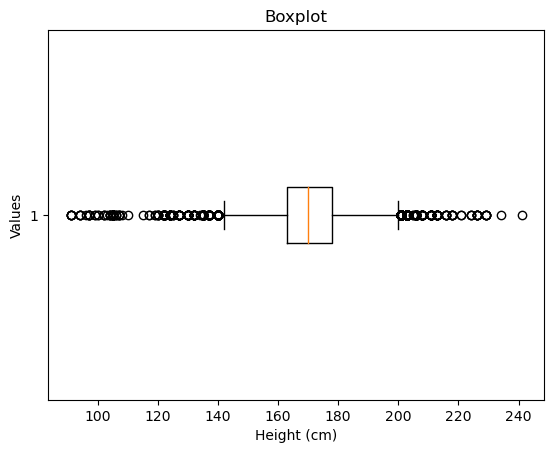

In [50]:
plt.boxplot(df['Height (cm)'], vert = False)
plt.title('Boxplot')
plt.ylabel('Values')
plt.xlabel('Height (cm)')
plt.show()

In [51]:
df['Height (cm)'].describe()

count    308853.000000
mean        170.615223
std          10.656985
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         241.000000
Name: Height (cm), dtype: float64

In [52]:
Q1 = df['Height (cm)'].quantile(0.25)
Q3 = df['Height (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df[(df['Height (cm)'] < limite_inferior) | (df['Height (cm)'] > limite_superior)]

# Encontrar el valor máximo atípico
valor_maximo_atipico = valores_atipicos['Height (cm)'].max()

print("Valor máximo atípico:")
print(valor_maximo_atipico)

Valor máximo atípico:
241.0


In [53]:
df = df[df['Height (cm)'] != valor_maximo_atipico]

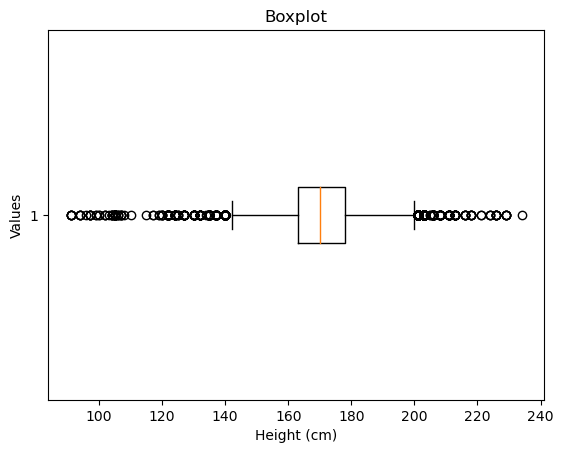

In [54]:
plt.boxplot(df['Height (cm)'], vert = False)
plt.title('Boxplot')
plt.ylabel('Values')
plt.xlabel('Height (cm)')
plt.show()

In [55]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['Height (cm)'].quantile(0.25)
Q3 = df['Height (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['Height (cm)'] < limite_inferior) | (df['Height (cm)'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 1054


In [56]:
total_filas = len(df)  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  # Value to calculate

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 1054 representa aproximadamente el 0.34% del total de datos


In [57]:
# Filtra y conserva solo los valores dentro del rango
df = df[(df['Height (cm)'] >= 100) & (df['Height (cm)'] <= 200)]

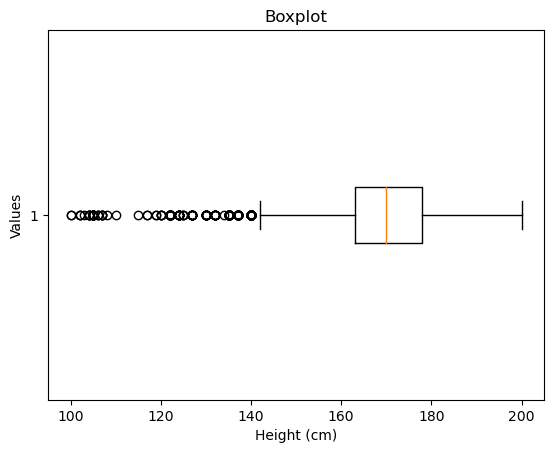

In [58]:
plt.boxplot(df['Height (cm)'], vert = False)
plt.title('Boxplot')
plt.ylabel('Values')
plt.xlabel('Height (cm)')
plt.show()

In [59]:
# Calculate again the media
# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Reemplaza los valores atípicos por la media de la columna
media_columna = df['Height (cm)'].mean()
df['Height (cm)'] = df['Height (cm)'].apply(lambda x: media_columna if x < limite_inferior or x > limite_superior else x)

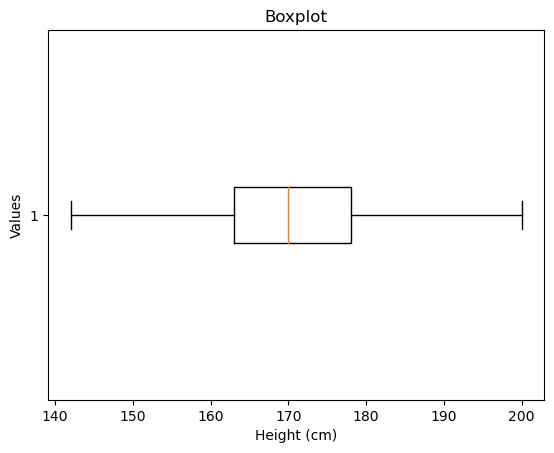

In [60]:
plt.boxplot(df['Height (cm)'], vert = False)
plt.title('Boxplot')
plt.ylabel('Values')
plt.xlabel('Height (cm)')
plt.show()

In [61]:
df['Height (cm)'].describe()

count    308234.000000
mean        170.610649
std          10.427360
min         142.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         200.000000
Name: Height (cm), dtype: float64

### Weight (kg)

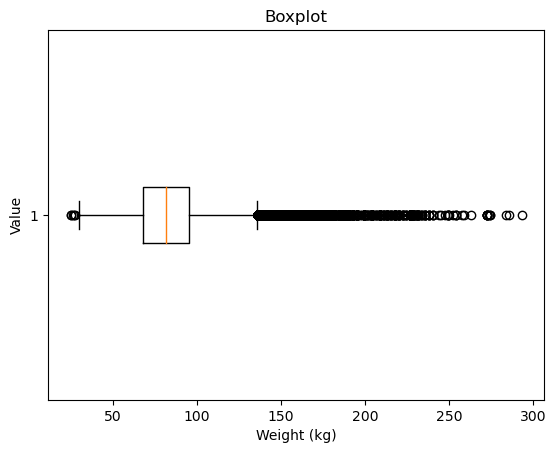

In [62]:
plt.boxplot(df['Weight (kg)'], vert = False)
plt.title('Boxplot')
plt.xlabel('Weight (kg)')
plt.ylabel('Value')
plt.show()

In [63]:
df['Weight (kg)'].describe()

count    308234.000000
mean         83.538195
std          21.293934
min          24.950000
25%          68.040000
50%          81.650000
75%          95.250000
max         293.020000
Name: Weight (kg), dtype: float64

In [64]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['Weight (kg)'].quantile(0.25)
Q3 = df['Weight (kg)'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['Weight (kg)'] < limite_inferior) | (df['Weight (kg)'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 7210


In [65]:
total_filas = 308854  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  # El valor que deseas calcular

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 7210 representa aproximadamente el 2.33% del total de datos


In [66]:
df['Weight (kg)'].mean()

83.53819455348858

In [67]:
df['Height (cm)'].mean()

170.61064933971124

In [68]:
df = df[(df['Weight (kg)'] >= 35) & (df['Weight (kg)'] <= 120)]

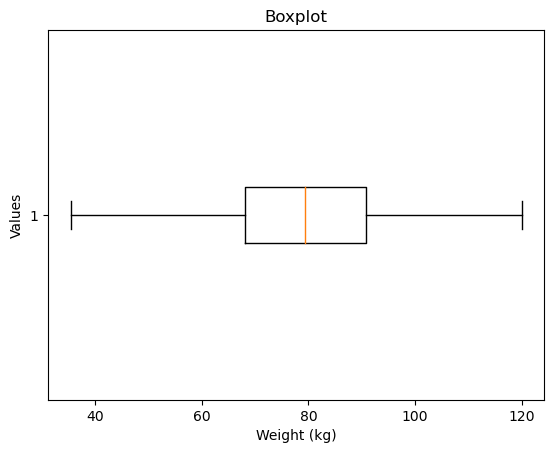

In [69]:
plt.boxplot(df['Weight (kg)'], vert = False)
plt.title('Boxplot')
plt.xlabel('Weight (kg)')
plt.ylabel('Values')
plt.show()

In [70]:
df['Weight (kg)'].describe()

count    290241.000000
mean         80.301119
std          16.785265
min          35.380000
25%          68.040000
50%          79.380000
75%          90.720000
max         120.000000
Name: Weight (kg), dtype: float64

### 

In [71]:
Q1 = df['Weight (kg)'].quantile(0.25)
Q3 = df['Weight (kg)'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['Weight (kg)'] < limite_inferior) | (df['Weight (kg)'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 0


### Column BMI

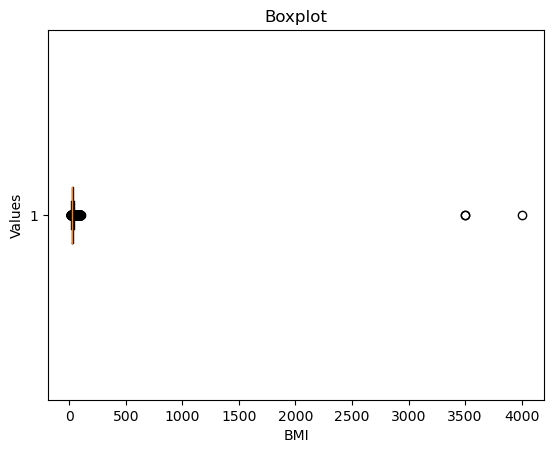

In [72]:
plt.boxplot(df['BMI'], vert = False)
plt.title('Boxplot')
plt.xlabel('BMI')
plt.ylabel('Values')
plt.show()

In [73]:
df['BMI'].describe()

count    290241.000000
mean         27.790387
std          12.900248
min          12.050000
25%          24.030000
50%          27.200000
75%          30.900000
max        4000.000000
Name: BMI, dtype: float64

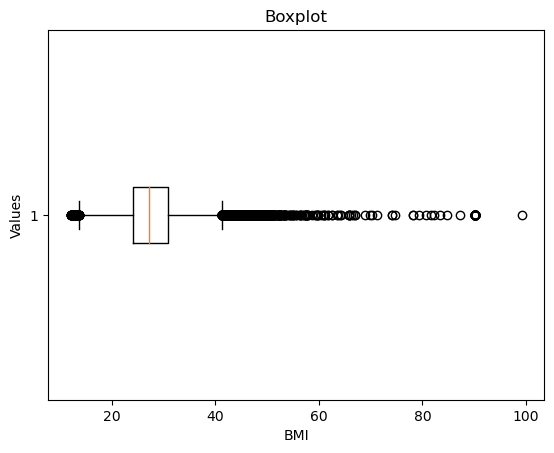

In [74]:
df = df[(df['BMI'] <= 2000)]
plt.boxplot(df['BMI'], vert = False)
plt.title('Boxplot')
plt.xlabel('BMI')
plt.ylabel('Values')
plt.show()

In [75]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['BMI'] < limite_inferior) | (df['BMI'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 4637


In [76]:
total_filas = len(df)  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  #Value to calculate

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 4637 representa aproximadamente el 1.60% del total de datos


In [77]:
df = df[(df['BMI'] >= 14) & (df['BMI'] <= 40)]

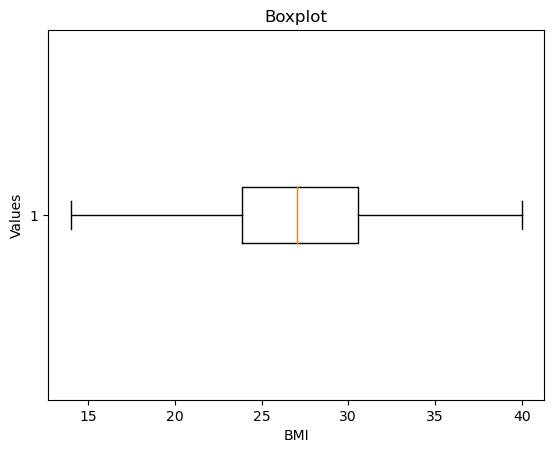

In [78]:
plt.boxplot(df['BMI'], vert = False)
plt.title('Boxplot')
plt.xlabel('BMI')
plt.ylabel('Values')
plt.show()

In [79]:
df['BMI'].describe()

count    283309.000000
mean         27.374410
std           4.753228
min          14.000000
25%          23.890000
50%          27.050000
75%          30.540000
max          39.990000
Name: BMI, dtype: float64

### Column Alcohol Consumption

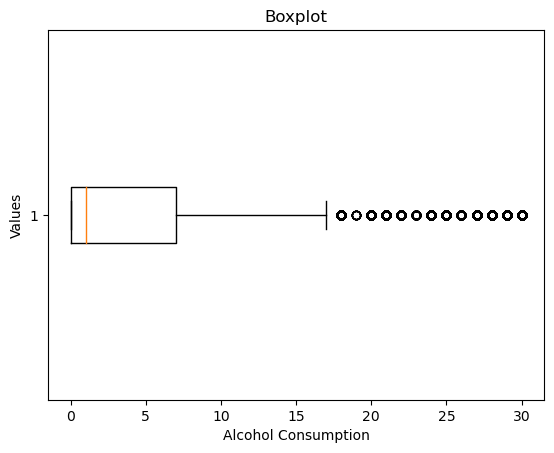

In [80]:
plt.boxplot(df['Alcohol Consumption'], vert = False)
plt.title('Boxplot')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Values')
plt.show()

In [81]:
df['Alcohol Consumption'].describe()

count    283309.000000
mean          5.247521
std           8.307332
min           0.000000
25%           0.000000
50%           1.000000
75%           7.000000
max          30.000000
Name: Alcohol Consumption, dtype: float64

In [82]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['Alcohol Consumption'].quantile(0.25)
Q3 = df['Alcohol Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['Alcohol Consumption'] < limite_inferior) | (df['Alcohol Consumption'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 30929


In [83]:
total_filas = len(df)  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  # El valor que deseas calcular

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 30929 representa aproximadamente el 10.92% del total de datos


In [84]:
# Encontrar el valor máximo atípico
valor_maximo_atipico = valores_atipicos['Alcohol Consumption'].max()

print("Valor máximo atípico:")
print(valor_maximo_atipico)

Valor máximo atípico:
30


Se mantienen, ya que personas alcoholicas toman todos los días (30 días por mes)

### Column Fruit Consumption

In [85]:
Valores_unicos_Fruit = df['Fruit Consumption'].unique()
Valores_unicos_Fruit

array([30, 12, 8, 16, 2, 1, 60, 0, 7, 5, 3, 6, 90, 28, 20, 4, 80, 24, 15,
       10, 25, 14, 120, 32, 40, 17, 45, 100, 9, 99, 96, 35, 50, 56, 48,
       72, 36, 84, 26, 23, 18, 27, 21, 42, 22, 11, 29, 64, 70, 33, 76, 44,
       39, 75, 31, 92, 104, 88, 65, '40', '60', '12', '16', '2', '10',
       '8', '30', '24', '3', '90', '4', '120', '5', '28', '99', '7', '0',
       '15', '20', '6', '1', '48', '45', '70', '27', '25', '96', '32',
       '11', '35', '9', '14', '29', '55', '13', '17', '18', '56', '23',
       '31', '26', '44', '21', '22', '50', '100', '36', '63', '80', '65',
       '97', '75', 'No', 'Yes', '108', '19', '88', 52, 19, 13, 98, 68,
       '33', '64', '84', '34', '68', '72', '116', '112', '92', 34, 54, 55,
       112, 38, 62, 85], dtype=object)

In [86]:
valor_yes = 'Yes'
valor_no = 'No'
# Usa el método value_counts() y selecciona el valor específico
conteo_valor_especifico = df['Fruit Consumption'].value_counts()[valor_yes]
# Muestra el resultado
print(f"El valor '{valor_yes}' se repite {conteo_valor_especifico} veces.")
conteo_valor_especifico = df['Fruit Consumption'].value_counts()[valor_no]

print(f"El valor '{valor_no}' se repite {conteo_valor_especifico} veces.")


El valor 'Yes' se repite 3 veces.
El valor 'No' se repite 4 veces.


In [87]:
# Valores que deseas eliminar ('yes' y 'no')
valores_a_eliminar = ['Yes', 'No']

# Filtra las filas que NO contienen los valores especificados
df = df[~df['Fruit Consumption'].isin(valores_a_eliminar)]

In [88]:
df['Fruit Consumption'] = df['Fruit Consumption'].astype(int)

In [89]:
Valores_unicos_Fruit = df['Fruit Consumption'].unique()
Valores_unicos_Fruit

array([ 30,  12,   8,  16,   2,   1,  60,   0,   7,   5,   3,   6,  90,
        28,  20,   4,  80,  24,  15,  10,  25,  14, 120,  32,  40,  17,
        45, 100,   9,  99,  96,  35,  50,  56,  48,  72,  36,  84,  26,
        23,  18,  27,  21,  42,  22,  11,  29,  64,  70,  33,  76,  44,
        39,  75,  31,  92, 104,  88,  65,  55,  13,  63,  97, 108,  19,
        52,  98,  68,  34, 116, 112,  54,  38,  62,  85])

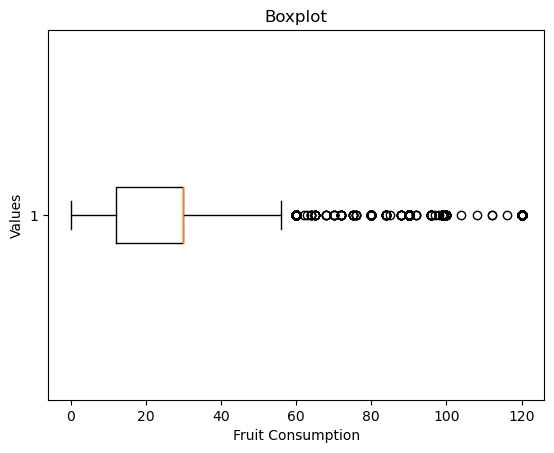

In [90]:
plt.boxplot(df['Fruit Consumption'], vert = False)
plt.title('Boxplot')
plt.xlabel('Fruit Consumption')
plt.ylabel('Values')
plt.show()

In [91]:
df['Fruit Consumption'].describe()

count    283302.000000
mean         30.163952
std          24.950803
min           0.000000
25%          12.000000
50%          30.000000
75%          30.000000
max         120.000000
Name: Fruit Consumption, dtype: float64

In [92]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['Fruit Consumption'].quantile(0.25)
Q3 = df['Fruit Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['Fruit Consumption'] < limite_inferior) | (df['Fruit Consumption'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 63698


In [93]:
total_filas = len(df)  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  # El valor que deseas calcular

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 63698 representa aproximadamente el 22.48% del total de datos


In [94]:
# Encontrar el valor máximo atípico
valor_maximo_atipico = atipicos['Fruit Consumption'].max()

print("Valor máximo atípico:")
print(valor_maximo_atipico)

Valor máximo atípico:
120


In [95]:
df['Fruit Consumption'].dtype

dtype('int64')

### Green_Vegetables_Consumption

In [96]:
Valores_unicos_green = df['Green_Vegetables_Consumption'].unique()
Valores_unicos_green

array([  0,   3,  30,   4,   8,  12,  20,   1,  16,  10,   2,   5,   6,
        60,  28,  25,  14,  40,   7,  22,  24,  15, 120,  90,  19,  13,
        11,  80,  27,  17,  56,  18,  21,  99,   9,  29,  31,  45,  23,
       100, 104,  32,  75,  36,  35, 112,  26,  33,  48,  96,  52,  76,
        84,  50,  34,  97,  88,  68,  92,  95,  64,  61,  65,  77, 124,
        85,  44,  39,  70,  93, 128,  37])

In [97]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['Green_Vegetables_Consumption'].quantile(0.25)
Q3 = df['Green_Vegetables_Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['Green_Vegetables_Consumption'] < limite_inferior) | (df['Green_Vegetables_Consumption'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 11154


In [98]:
total_filas = len(df)  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  # El valor que deseas calcular

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 11154 representa aproximadamente el 3.94% del total de datos


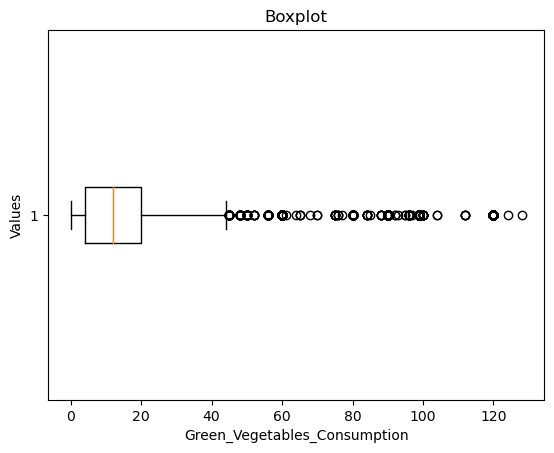

In [99]:
plt.boxplot(df['Green_Vegetables_Consumption'], vert = False)
plt.title('Boxplot')
plt.xlabel('Green_Vegetables_Consumption')
plt.ylabel('Values')
plt.show()

### Column FriedPotato Consumption

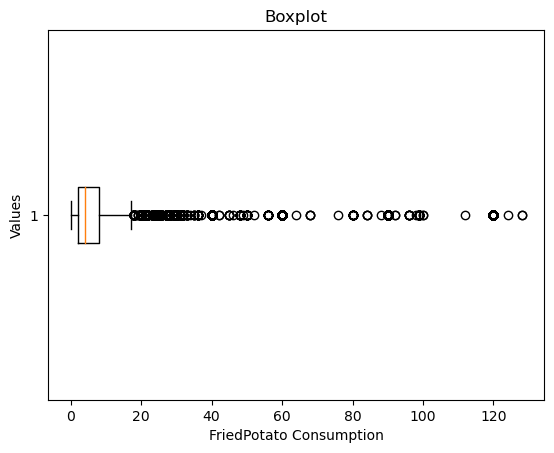

In [100]:
plt.boxplot(df['FriedPotato Consumption'], vert = False)
plt.title('Boxplot')
plt.xlabel('FriedPotato Consumption')
plt.ylabel('Values')
plt.show()

In [101]:
# Calcula el rango intercuartílico (IQR)
Q1 = df['FriedPotato Consumption'].quantile(0.25)
Q3 = df['FriedPotato Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define el límite para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtra los valores atípicos
atipicos = df[(df['FriedPotato Consumption'] < limite_inferior) | (df['FriedPotato Consumption'] > limite_superior)]

# Cuenta los valores atípicos
cantidad_atipicos = len(atipicos)

print(f"La cantidad de datos atípicos es: {cantidad_atipicos}")

La cantidad de datos atípicos es: 17336


In [102]:
total_filas = len(df)  # Número total de filas en el DataFrame
valor_especifico = cantidad_atipicos  # El valor que deseas calcular

# Calcula el porcentaje
porcentaje = (valor_especifico / total_filas) * 100

print(f"El valor {valor_especifico} representa aproximadamente el {porcentaje:.2f}% del total de datos")

El valor 17336 representa aproximadamente el 6.12% del total de datos


## Formato DataFrame

In [103]:
# strip remueve los espacios antes y despues de la palabra

df.columns = [i.strip().replace(' ', '_') for i in df.columns]
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [104]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [105]:
#df.General_Health = df.General_Health.astype('category')
#df.Checkup = df.Checkup.astype('category')
#df.Age_Category = df.Age_Category.astype('category')
#df.BMI = df.BMI.astype('category')

In [106]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

### Determine Categories

In [107]:
def General_Health(Health):
    if Health == 'Poor':
        return 1
    elif Health == 'Fair':
        return 2
    elif Health == 'Good':
        return 3
    elif Health == 'Very Good':
        return 4
    elif Health == 'Excellent':
        return 5
# Create a new column "BMI Group" using the classification function
df["General_Health"] = df["General_Health"].apply(General_Health)
df['General_Health'] = df['General_Health'].astype(int)

In [108]:
def Checkup(Checkup):
    if Checkup == 'Never':
        return 1
    elif Checkup == 'Within the past year':
        return 2
    elif Checkup == 'Within the past 2 years':
        return 3
    elif Checkup == 'Within the past 5 years':
        return 4
    elif Checkup == '5 or more years ago':
        return 5
# Create a new column "BMI Group" using the classification function
df["Checkup"] = df["Checkup"].apply(Checkup)

In [109]:
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1,4,2,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0,30,0,4
2,4,2,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4,12,3,16


In [110]:
df.dtypes

General_Health                    int64
Checkup                           int64
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [111]:
#def Classify_BMI(BMI):
 #   if BMI >= 0.0 and BMI < 18.5:
  #      return "Underweight"
   # elif BMI >= 18.5 and BMI < 25.0:
    #    return "Normal Weight"
  #  elif BMI >= 25.0 and BMI < 30.0:
   #     return "Overweight"
   # elif BMI >= 30.0 and BMI < 35.0:
    #    return "Obesity Class 1"
   # elif BMI >= 35.0 and BMI < 40.0:
    #    return "Obesity Class 2"
    #elif BMI >= 40.0:
     #   return "Obesity Class 3"
    #else:
     #   return "Invalid"

# Create a new column "BMI Group" using the classification function
#df["BMI"] = df["BMI"].apply(Classify_BMI)

In [112]:
#df.BMI  = df.BMI.astype('category')

In [113]:
def Classify_Age(age):
    if age == '18-24':
        return 1
    elif age == '25-29':
        return 2
    elif age == '30-34':
        return 3
    elif age == '35-39':
        return 4
    elif age == '40-44':
        return 5
    elif age == '45-49':
        return 6
    elif age == '50-54':
        return 7
    elif age == '55-59':
        return 8
    elif age == '60-64':
        return 9
    elif age == '65-69':
        return 10
    elif age == '70-74':
        return 11
    elif age == '75-79':
        return 12
    elif age == '80+':
        return 13
# Create a new column "Age Group" using the classification function
df["Age_Category"] = df["Age_Category"].apply(Classify_Age)

In [114]:
df.Age_Category  = df.Age_Category.astype('category')

In [115]:
def Classify_Yes_No(variable):
    if variable == 'Yes':
        return 1
    elif variable == 'No':
        return 0
# Create a new column "Age Group" using the classification function
df["Exercise"] = df["Exercise"].apply(Classify_Yes_No)
df["Heart_Disease"] = df["Heart_Disease"].apply(Classify_Yes_No)
df["Skin_Cancer"] = df["Skin_Cancer"].apply(Classify_Yes_No)
df["Other_Cancer"] = df["Other_Cancer"].apply(Classify_Yes_No)
df["Depression"] = df["Depression"].apply(Classify_Yes_No)
df["Arthritis"] = df["Arthritis"].apply(Classify_Yes_No)
df["Smoking_History"] = df["Smoking_History"].apply(Classify_Yes_No)


In [116]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1,4,2,0,1,0.0,0,0,Yes,0,Female,11,165.0,77.11,28.29,0,0,30,0,4
2,4,2,1,0,0.0,0,0,Yes,0,Female,9,163.0,88.45,33.47,0,4,12,3,16
3,1,2,1,1,0.0,0,0,Yes,0,Male,12,180.0,93.44,28.73,0,0,30,30,8
4,3,2,0,0,0.0,0,0,No,0,Male,13,191.0,88.45,24.37,1,0,8,4,0
6,2,2,1,1,0.0,0,0,No,1,Male,9,175.0,69.85,22.74,1,0,16,8,0


In [117]:
# Utiliza get_dummies para crear variables dummy
df_dummies = pd.get_dummies(df['Diabetes'], prefix='Diabetes')

# Concatena las nuevas columnas dummy al DataFrame original
df = pd.concat([df, df_dummies], axis=1)

# Elimina la columna original si lo deseas
#df = df.drop('MiColumna', axis=1)

In [118]:
# Utiliza get_dummies para crear variables dummy
df_dummies = pd.get_dummies(df['Sex'], prefix='Sex')

# Concatena las nuevas columnas dummy al DataFrame original
df = pd.concat([df, df_dummies], axis=1)

In [119]:
#df = pd.get_dummies(df, drop_first=True)

In [120]:
#df = df.astype('category')

In [121]:
df.dtypes

General_Health                                            int64
Checkup                                                   int64
Exercise                                                  int64
Heart_Disease                                             int64
Skin_Cancer                                             float64
Other_Cancer                                              int64
Depression                                                int64
Diabetes                                                 object
Arthritis                                                 int64
Sex                                                      object
Age_Category                                           category
Height_(cm)                                             float64
Weight_(kg)                                             float64
BMI                                                     float64
Smoking_History                                           int64
Alcohol_Consumption                     

In [122]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Sex_Female,Sex_Male,Sex_Non-Binary
1,4,2,0,1,0.0,0,0,Yes,0,Female,...,30,0,4,0,0,1,0,1,0,0
2,4,2,1,0,0.0,0,0,Yes,0,Female,...,12,3,16,0,0,1,0,1,0,0
3,1,2,1,1,0.0,0,0,Yes,0,Male,...,30,30,8,0,0,1,0,0,1,0
4,3,2,0,0,0.0,0,0,No,0,Male,...,8,4,0,1,0,0,0,0,1,0
6,2,2,1,1,0.0,0,0,No,1,Male,...,16,8,0,1,0,0,0,0,1,0


### Verify Category

In [123]:
# BMI
#df.BMI.cat.categories

In [124]:
# General_Health
#df.General_Health.cat.categories

In [125]:
df.Age_Category.cat.categories

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [126]:
df = df.drop('Sex', axis=1)

In [127]:
df = df.drop('Diabetes', axis=1)

In [128]:
df_clean = df

In [129]:
df_clean.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Age_Category,Height_(cm),...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Sex_Female,Sex_Male,Sex_Non-Binary
1,4,2,0,1,0.0,0,0,0,11,165.0,...,30,0,4,0,0,1,0,1,0,0
2,4,2,1,0,0.0,0,0,0,9,163.0,...,12,3,16,0,0,1,0,1,0,0
3,1,2,1,1,0.0,0,0,0,12,180.0,...,30,30,8,0,0,1,0,0,1,0


In [130]:
#df_clean.to_excel('CleanData.xlsx', index=False)

In [131]:
pd.isnull(df).sum()

General_Health                                         0
Checkup                                                0
Exercise                                               0
Heart_Disease                                          0
Skin_Cancer                                            9
Other_Cancer                                           0
Depression                                             0
Arthritis                                              0
Age_Category                                           0
Height_(cm)                                            0
Weight_(kg)                                            0
BMI                                                    0
Smoking_History                                        0
Alcohol_Consumption                                    0
Fruit_Consumption                                      0
Green_Vegetables_Consumption                           0
FriedPotato_Consumption                                0
Diabetes_No                    

In [132]:
#df = pd.get_dummies(df, drop_first=True)

/var/folders/wj/3_csl2wx1cdgyk8j3p42j6880000gn/T/ipykernel_7973/2512368824.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


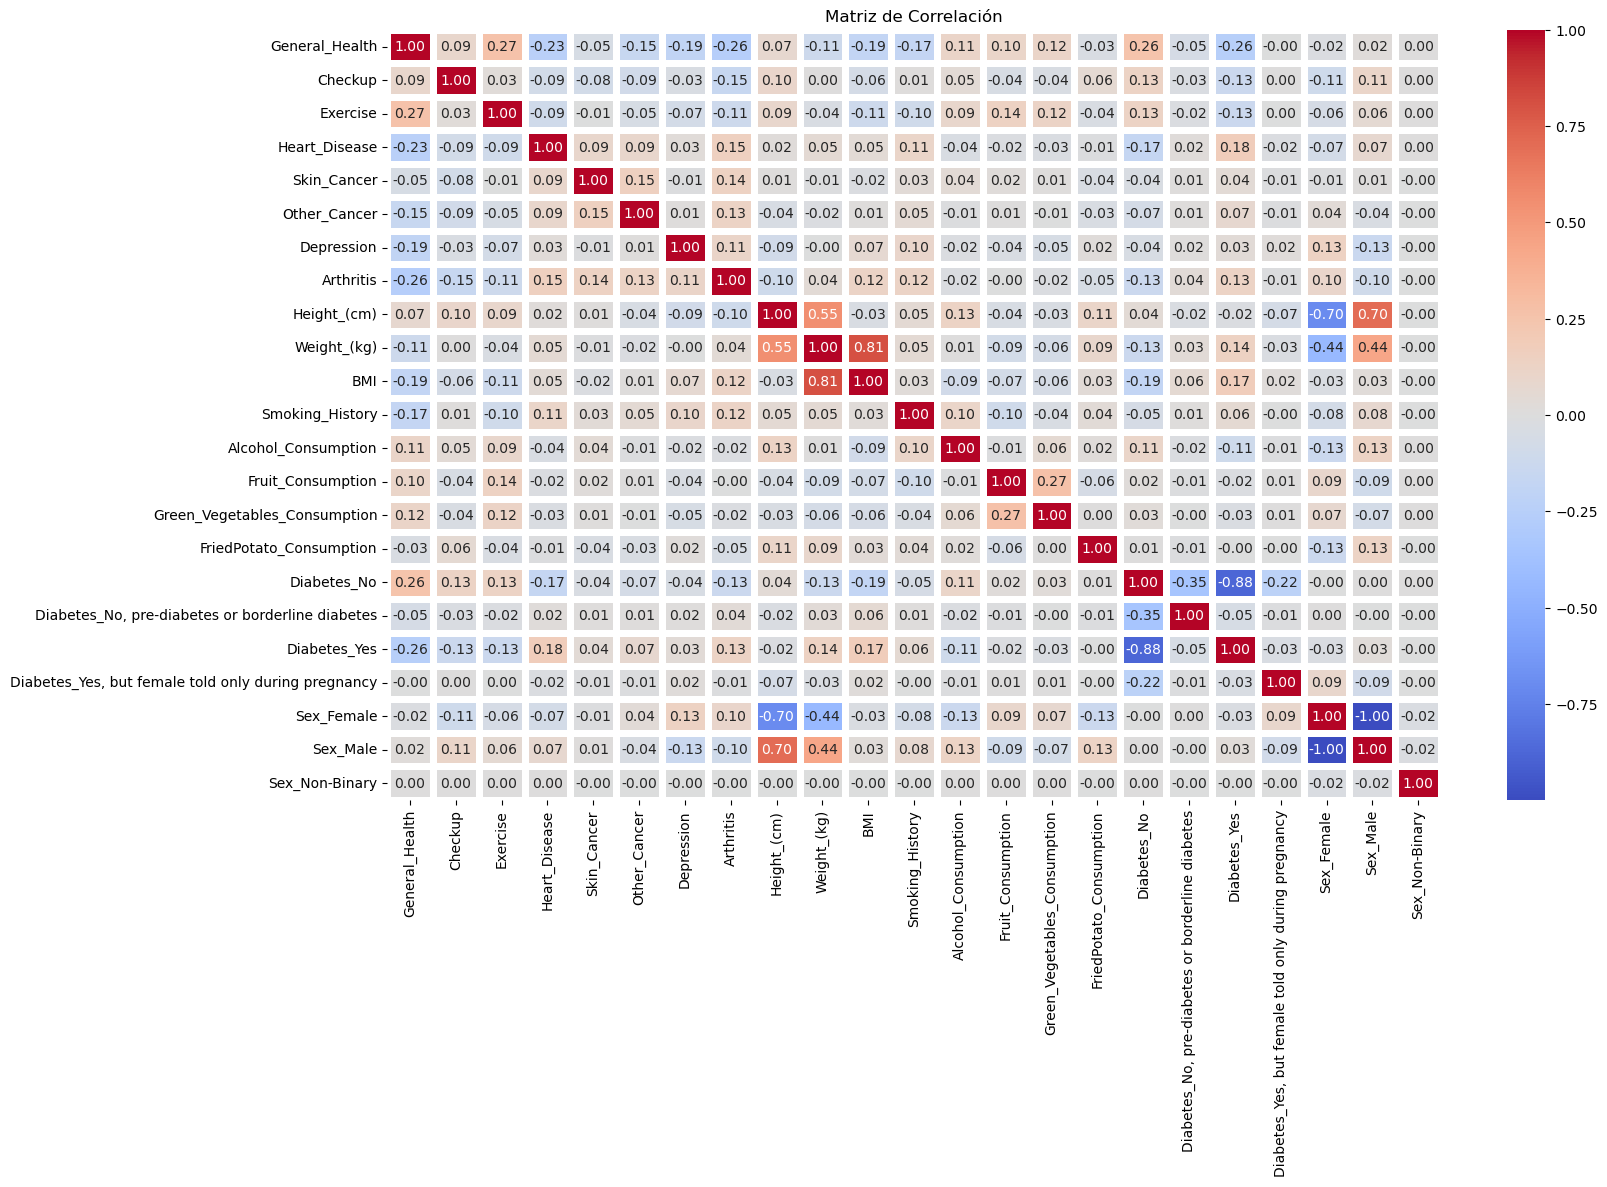

In [133]:
correlation_matrix = df.corr()

# Configuración de la visualización
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=5)
plt.title("Matriz de Correlación")
plt.show()

In [134]:
df_clean.shape

(283302, 24)